#In this project we will perform EDA,develop models for prediction and finally visualise the prediction (we will also use Ridge regression to refine the performance of Linear regression models)

You have to perform data analytics on a medical insurance charges dataset. This is a filtered and modified version of the Medical Insurance Price Prediction dataset, available under the CC0 1.0 Universal License on the Kaggle website.
https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction/data

##Objectives
In this project, you will:

* Load the data as a pandas dataframe
* Clean the data, taking care of the blank entries
* Run exploratory data analysis and identify the attributes that most affect the charges
* Develop single variable and multi variable Linear Regression models for predicting the charges
* Use Ridge regression to refine the performance of Linear regression models.
* Create Scatter plot of actual vs predicted values

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

Download the dataset to this lab environment

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [ ]:
df = pd.read_csv(filepath, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


Add the headers to the dataframe, as mentioned in the table in objectives

In [ ]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [ ]:
#replace the '?' entries with 'NaN' values.
df.replace('?', np.nan, inplace = True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle missing data:

For continuous attributes (e.g., age), replace missing values with the mean.
For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info().

In [ ]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


<ipython-input-11-18762c975f26>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
<ipython-input-11-18762c975f26>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Also note, that the charges column has values which are more than 2 decimal places long. Update the charges column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.

In [ ]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


##Exploratory Data Analysis (EDA)

Implementing the regression plot for charges with respect to bmi.

(0.0, 66902.85800000001)

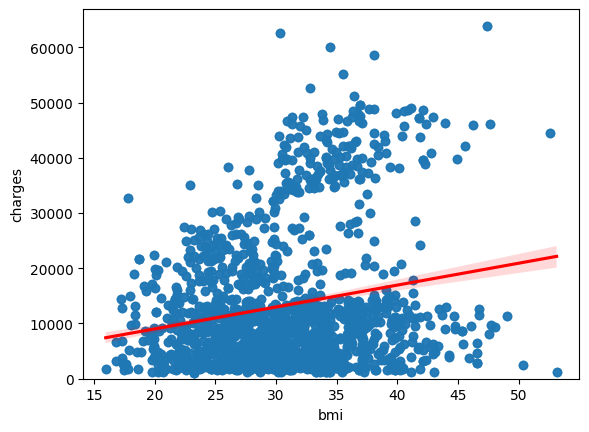

In [ ]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

Implementing the box plot for charges with respect to smoker.

<Axes: xlabel='smoker', ylabel='charges'>

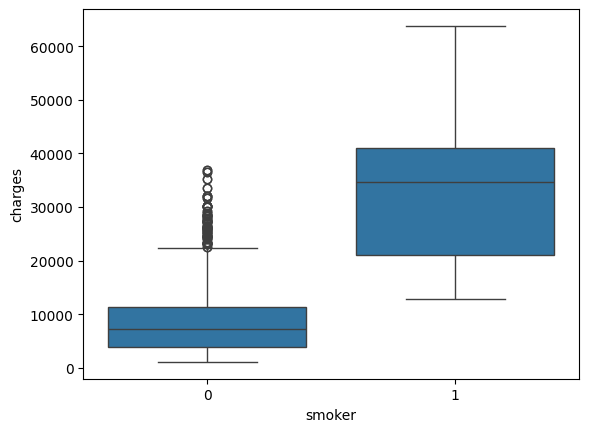

In [ ]:
sns.boxplot(x="smoker", y="charges", data=df)


In [ ]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


We can see that there might be correlation between smoker and charges

##Model Development

Fitting a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the $R^2$
 score of this model

In [ ]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Fitting a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the$R^2$
 score of this model. You should see an improvement in the performance.

In [ ]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


 Creating a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452483847008637


so this method has better $R^2$ score then the linear and multi linear regression model

#Model Refinement

Splitting the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initializing a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [ ]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


Applying polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608152


#Predicting the Charges
We will perform Linear Regression and Decidion Tree Regression and compare the predicted charges with the actual charges

Lets do Linear Regression first

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
YPred = lr_model.predict(X_test)

In [ ]:
mse1 = mean_squared_error(y_test, YPred)
rmse1 = mean_squared_error(y_test, YPred, squared=False)
r2_1 = r2_score(y_test, YPred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


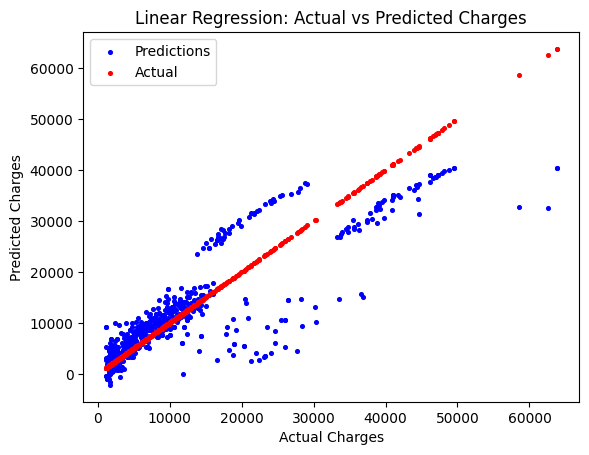

Mean Squared Error (MSE): 39969741.316051774
Root Mean Squared Error (RMSE): 6322.162708761281
R-squared (R2) Score: 0.739578501113265


In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, YPred, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()

# Printing metrics
print('Mean Squared Error (MSE):', mse1)
print('Root Mean Squared Error (RMSE):', rmse1)
print('R-squared (R2) Score:', r2_1)

Lets do Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtm = DecisionTreeRegressor()
dtm.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dtPred = dtm.predict(X_test)

In [ ]:
mse2 = mean_squared_error(y_test, dtPred)
rmse2 = mean_squared_error(y_test, dtPred, squared=False)
r2_2 = r2_score(y_test, dtPred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


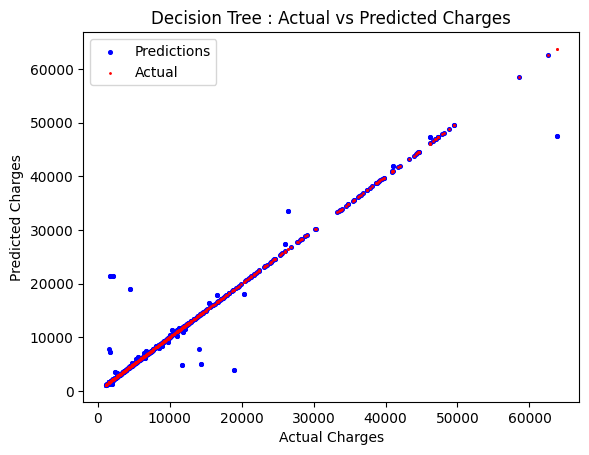

Mean Squared Error (MSE): 6214674.963116757
Root Mean Squared Error (RMSE): 2492.924981445843
R-squared (R2) Score: 0.9595084952841871


In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, dtPred, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree : Actual vs Predicted Charges')
plt.legend()
plt.show()

# Printing metrics
print('Mean Squared Error (MSE):', mse2)
print('Root Mean Squared Error (RMSE):', rmse2)
print('R-squared (R2) Score:', r2_2)